In [1]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt

# Change the plot size.
plt.rcParams['figure.figsize'] = [18.0, 12.0]

In [191]:
import pandas as pd
import numpy as np

In [192]:
from pandas_summary import DataFrameSummary

In [107]:
# import my Finance Analysis Tools (fat)
import finance as fat

In [375]:
# full imports of fastai fail on windows, so just import some of it for now
from fastai.structured import add_datepart, apply_cats, proc_df

from fastai.structured import *
from fastai.column_data import *
np.set_printoptions(threshold=50, edgeitems=20)

## Load basic data

In [344]:
ticker = 'IAU'
data = fat.get_price_data(ticker)

Loaded data for IAU: 2005-01-28 to 2018-02-16.


In [345]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-02-12,12.66,12.74,12.66,12.68,12.68,11623200.0
2018-02-13,12.74,12.77,12.70,12.76,12.76,8174100.0
2018-02-14,12.80,13.02,12.78,12.98,12.98,19514800.0
2018-02-15,13.01,13.02,12.95,12.99,12.99,13914600.0
2018-02-16,12.98,13.03,12.92,12.95,12.95,13611800.0


## Create Features

We're going to try to be predicting tomorrow's closing price, so add it as a column.

In [346]:
data['Tomorrow Adj Close'] = data['Adj Close'].shift(-1)

In [347]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume,Tomorrow Adj Close
Date,,,,,,,
2018-02-12,12.66,12.74,12.66,12.68,12.68,11623200.0,12.76
2018-02-13,12.74,12.77,12.70,12.76,12.76,8174100.0,12.98
2018-02-14,12.80,13.02,12.78,12.98,12.98,19514800.0,12.99
2018-02-15,13.01,13.02,12.95,12.99,12.99,13914600.0,12.95
2018-02-16,12.98,13.03,12.92,12.95,12.95,13611800.0,NaN


We'll also add google trends for searches for  "gold price usd"

In [348]:
search = "gold price usd"
trends, related_queries = fat.get_google_trends(data, search)

In [349]:
#related_queries

In [350]:
data[f'Search Trend'] = trends[search]

In [351]:
data = data.dropna()
data[-14:]

,Open,High,Low,Close,Adj Close,Volume,Tomorrow Adj Close,Search Trend
Date,,,,,,,,
2018-01-12,12.76,12.87,12.73,12.86,12.86,13305400.0,12.86,76.064516
2018-01-16,12.82,12.87,12.79,12.86,12.86,7295900.0,12.77,76.451613
2018-01-17,12.84,12.88,12.74,12.77,12.77,22220900.0,12.75,76.548387
2018-01-18,12.79,12.80,12.73,12.75,12.75,18560300.0,12.78,76.645161
2018-01-19,12.80,12.83,12.78,12.78,12.78,6918900.0,12.81,76.741935
2018-01-22,12.81,12.83,12.78,12.81,12.81,6715900.0,12.88,77.032258
2018-01-23,12.81,12.89,12.78,12.88,12.88,11162200.0,13.05,77.129032
2018-01-24,13.00,13.08,12.98,13.05,13.05,15587600.0,12.94,77.225806
2018-01-25,13.03,13.11,12.89,12.94,12.94,19944800.0,12.97,77.322581


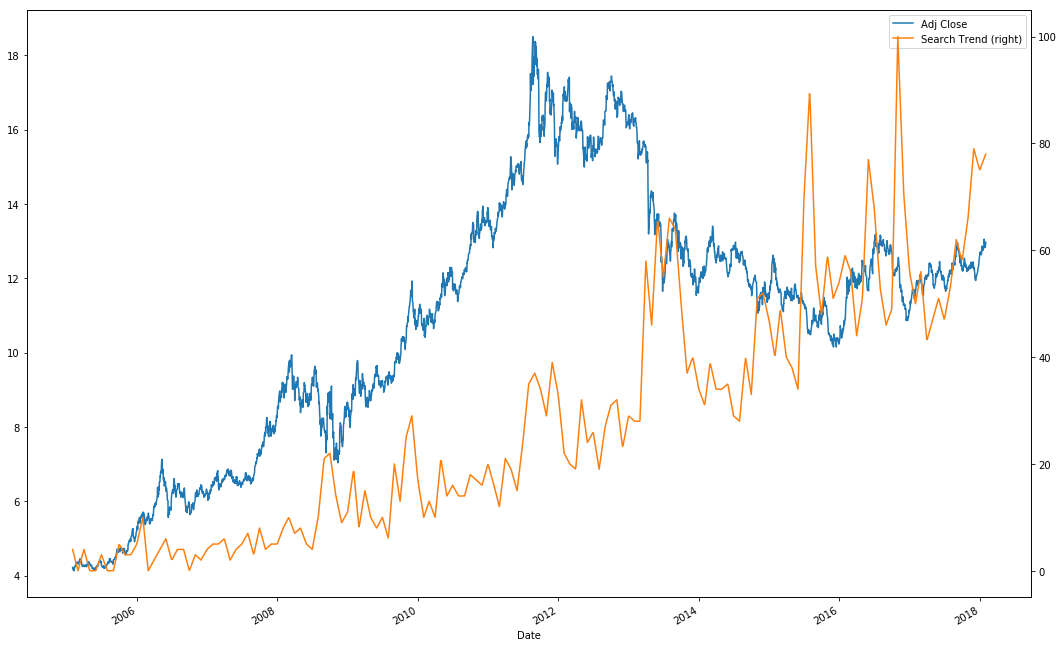

In [352]:
plot_data = data[['Adj Close', 'Search Trend']]
plot_data.plot(secondary_y = ['Search Trend'])

Add separate columns for various date parts.

In [353]:
data = data.reset_index()
add_datepart(data, 'Date', drop=False)
data = data.set_index('Date')

In [354]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume,Tomorrow Adj Close,Search Trend,Year,Month,...,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,Elapsed
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-26,12.98,13.01,12.95,12.97,12.97,14350800.0,12.88,77.419355,2018,1,...,26,4,26,False,False,False,False,False,False,1516924800
2018-01-29,12.92,12.92,12.84,12.88,12.88,7974300.0,12.83,77.709677,2018,1,...,29,0,29,False,False,False,False,False,False,1517184000
2018-01-30,12.94,12.95,12.83,12.83,12.83,9532200.0,12.92,77.806452,2018,1,...,30,1,30,False,False,False,False,False,False,1517270400
2018-01-31,12.90,12.94,12.79,12.92,12.92,20848500.0,12.97,77.903226,2018,1,...,31,2,31,True,False,False,False,False,False,1517356800
2018-02-01,12.88,12.97,12.86,12.97,12.97,13352000.0,12.80,78.000000,2018,2,...,1,3,32,False,True,False,False,False,False,1517443200


Add in columns for several Simple Moving Averages for various periods of days.

In [355]:
fat.add_sma_info(data, 'Adj Close')
data = data.dropna()

In [356]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume,Tomorrow Adj Close,Search Trend,Year,Month,...,Is_quarter_start,Is_year_end,Is_year_start,Elapsed,Adj Close SMA5,Adj Close SMA10,Adj Close SMA20,Adj Close SMA50,Adj Close SMA100,Adj Close SMA200
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-26,12.98,13.01,12.95,12.97,12.97,14350800.0,12.88,77.419355,2018,1,...,False,False,False,1516924800,12.930,12.867,12.7500,12.4320,12.4290,12.27720
2018-01-29,12.92,12.92,12.84,12.88,12.88,7974300.0,12.83,77.709677,2018,1,...,False,False,False,1517184000,12.944,12.869,12.7720,12.4434,12.4289,12.27990
2018-01-30,12.94,12.95,12.83,12.83,12.83,9532200.0,12.92,77.806452,2018,1,...,False,False,False,1517270400,12.934,12.866,12.7880,12.4544,12.4289,12.28205
2018-01-31,12.90,12.94,12.79,12.92,12.92,20848500.0,12.97,77.903226,2018,1,...,False,False,False,1517356800,12.908,12.881,12.8005,12.4670,12.4285,12.28490
2018-02-01,12.88,12.97,12.86,12.97,12.97,13352000.0,12.80,78.000000,2018,2,...,False,False,False,1517443200,12.914,12.903,12.8170,12.4778,12.4287,12.28770


In [357]:
DataFrameSummary(data).summary().T

,count,mean,std,min,25%,50%,75%,max,counts,uniques,missing,missing_perc,types
Open,3075,11.2798,3.13554,4.663,9.001,11.78,12.9,18.51,3075,1606,0,0%,numeric
High,3075,11.3391,3.14613,4.68,9.0765,11.82,12.96,18.63,3075,1623,0,0%,numeric
Low,3075,11.2141,3.12339,4.651,8.9305,11.72,12.85,18.25,3075,1630,0,0%,numeric
Close,3075,11.2792,3.13566,4.664,9.013,11.78,12.895,18.5,3075,1631,0,0%,numeric
Adj Close,3075,11.2792,3.13566,4.664,9.013,11.78,12.895,18.5,3075,1631,0,0%,numeric
Volume,3075,4.96951e+06,4.588e+06,135000,2.11415e+06,3.8351e+06,6.35155e+06,6.99811e+07,3075,2904,0,0%,numeric
Tomorrow Adj Close,3075,11.2818,3.13351,4.664,9.015,11.78,12.895,18.5,3075,1630,0,0%,numeric
Search Trend,3075,29.5815,21.8064,0,9.93218,25.8667,47.8855,100,3075,2171,0,0%,numeric
Year,3075,2011.48,3.52928,2005,2008,2011,2015,2018,3075,14,0,0%,numeric
Month,3075,6.5626,3.4662,1,4,7,10,12,3075,12,0,0%,numeric


In [358]:
data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Tomorrow Adj Close', 'Search Trend', 'Year', 'Month', 'Week', 'Day',
       'Dayofweek', 'Dayofyear', 'Is_month_end', 'Is_month_start',
       'Is_quarter_end', 'Is_quarter_start', 'Is_year_end', 'Is_year_start',
       'Elapsed', 'Adj Close SMA5', 'Adj Close SMA10', 'Adj Close SMA20',
       'Adj Close SMA50', 'Adj Close SMA100', 'Adj Close SMA200'],
      dtype='object')

Break the columns up into "category variables" and "continuous variables".

In [359]:
cat_vars = ['Year', 'Month', 'Week', 'Day', 'Dayofweek', 'Dayofyear', 'Is_month_end', 'Is_month_start', 
            'Is_quarter_end', 'Is_quarter_start', 'Is_year_end', 'Is_year_start']

contin_vars = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Search Trend', 'Elapsed', 'Adj Close SMA5', 
               'Adj Close SMA10', 'Adj Close SMA20', 'Adj Close SMA50', 'Adj Close SMA100', 'Adj Close SMA200']

Split data into train and test sets.

In [360]:
data_len = len(data)
train_len = int(data_len * .8)
joined = data[:train_len]
joined_test = data[train_len:]
del joined_test['Tomorrow Adj Close']

In [361]:
#train.tail().T

In [362]:
#test.head().T

In [363]:
#test.tail().T

In [364]:
dep = 'Tomorrow Adj Close'
joined = joined.reset_index()
joined = joined[cat_vars+contin_vars+[dep, 'Date']].copy()

In [365]:
#train.tail().T

In [366]:
joined_test[dep] = 0
joined_test = joined_test.reset_index()
joined_test.head().T

C:\Users\matth\AppData\Local\conda\conda\envs\fastai\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,0,1,2,3,4
Date,2015-08-25 00:00:00,2015-08-26 00:00:00,2015-08-27 00:00:00,2015-08-28 00:00:00,2015-08-31 00:00:00
Open,11.09,10.87,10.83,10.9,10.91
High,11.1,10.9,10.9,11.02,10.98
Low,10.96,10.8,10.8,10.9,10.9
Close,11.02,10.87,10.85,10.95,10.98
Adj Close,11.02,10.87,10.85,10.95,10.98
Volume,5.6642e+06,2.8567e+06,5.5562e+06,2.2159e+06,2.3362e+06
Search Trend,64.4516,63.3871,62.3226,61.2581,58.0645
Year,2015,2015,2015,2015,2015
Month,8,8,8,8,8


In [367]:
joined_test = joined_test[cat_vars+contin_vars+[dep, 'Date']].copy()

In [368]:
for v in cat_vars: joined[v] = joined[v].astype('category').cat.as_ordered()

In [369]:
apply_cats(joined_test, joined)

In [317]:
train.tail().T

,2455,2456,2457,2458,2459
Year,2015,2015,2015,2015,2015
Month,8,8,8,8,8
Week,34,34,34,34,35
Day,18,19,20,21,24
Dayofweek,1,2,3,4,0
Dayofyear,230,231,232,233,236
Is_month_end,False,False,False,False,False
Is_month_start,False,False,False,False,False
Is_quarter_end,False,False,False,False,False
Is_quarter_start,False,False,False,False,False


We're going to run on full sample size.

In [372]:
samp_size = len(joined)
joined_samp = joined.set_index("Date")

We can now process our data...

In [377]:
df, y, nas, mapper = proc_df(joined_samp, dep, do_scale=True)
yl = np.log(y)

In [378]:
df.head(2)

,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,...,Adj Close,Volume,Search Trend,Elapsed,Adj Close SMA5,Adj Close SMA10,Adj Close SMA20,Adj Close SMA50,Adj Close SMA100,Adj Close SMA200
Date,,,,,,,,,,,,,,,,,,,,,
2005-11-14,1,11,46,14,1,317,1,1,1,1,...,-1.861378,-1.018254,-1.115931,-1.732802,-1.862559,-1.868107,-1.852243,-1.832855,-1.834245,-1.778338
2005-11-15,1,11,46,15,2,318,1,1,1,1,...,-1.861666,-0.972090,-1.115931,-1.731831,-1.859218,-1.865546,-1.852803,-1.831521,-1.833476,-1.777716


In time series data, cross-validation is not random. Instead, our holdout data is generally the most recent data, as it would be in real application. This issue is discussed in detail in [this post](http://www.fast.ai/2017/11/13/validation-sets/) on our web site.

One approach is to take the last 25% of rows (sorted by date) as our validation set.

In [379]:
train_ratio = 0.75
# train_ratio = 0.9
train_size = int(samp_size * train_ratio); train_size
val_idx = list(range(train_size, len(df)))

## Deep Learning

We're ready to put together our models.

Root-mean-squared percent error is the metric Kaggle used for this competition.

In [380]:
def inv_y(a): return np.exp(a)

def exp_rmspe(y_pred, targ):
    targ = inv_y(targ)
    pct_var = (targ - inv_y(y_pred))/targ
    return math.sqrt((pct_var**2).mean())

max_log_y = np.max(yl)
y_range = (0, max_log_y*1.2)

We can create a ModelData object directly from out data frame.

In [381]:
md = ColumnarModelData.from_data_frame(PATH, val_idx, df, yl.astype(np.float32), cat_flds=cat_vars, bs=128,
                                       test_df=df_test)

NameError: name 'ColumnarModelData' is not defined

Create categorical variables.

In [382]:
cat_sz = [(c, len(joined_samp[c].cat.categories)+1) for c in cat_vars]
cat_sz

[('Year', 12),
 ('Month', 13),
 ('Week', 54),
 ('Day', 32),
 ('Dayofweek', 6),
 ('Dayofyear', 366),
 ('Is_month_end', 3),
 ('Is_month_start', 3),
 ('Is_quarter_end', 3),
 ('Is_quarter_start', 3),
 ('Is_year_end', 3),
 ('Is_year_start', 2)]

We use the *cardinality* of each variable (that is, its number of unique values) to decide how large to make its *embeddings*. Each level will be associated with a vector with length defined as below.

In [385]:
emb_szs = [(c, min(50, (c+1)//2)) for _,c in cat_sz]
emb_szs

[(12, 6),
 (13, 7),
 (54, 27),
 (32, 16),
 (6, 3),
 (366, 50),
 (3, 2),
 (3, 2),
 (3, 2),
 (3, 2),
 (3, 2),
 (2, 1)]

Find learning rate.

In [ ]:
m = md.get_learner(emb_szs, len(df.columns)-len(cat_vars),
                   0.04, 1, [1000,500], [0.001,0.01], y_range=y_range)
lr = 1e-3

In [ ]:
m.lr_find()

In [ ]:
m.sched.plot(100)

### Sample

In [ ]:
m = md.get_learner(emb_szs, len(df.columns)-len(cat_vars),
                   0.04, 1, [1000,500], [0.001,0.01], y_range=y_range)
lr = 1e-3

In [ ]:
m.fit(lr, 3, metrics=[exp_rmspe])